In [2]:
import os
import requests
from pathlib import Path
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [3]:
import nltk
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer

it_stop_words = set(nltk.corpus.stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pgsstas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
news_folder = '/home/pgsstas/diploma/news_data/our_data_txt/'

import glob

filenames = list(glob.glob(news_folder + '**/*.txt', recursive=True))

In [5]:
import spacy
import re

# 1. Lemmatization and filtration

nlp = spacy.load('ru_core_news_sm')

def lemmatize(text: str) -> str:
    return " ".join([token.lemma_ for token in nlp(text) if token.lemma_ not in it_stop_words])



/home/pgsstas/diploma/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
with open('/home/pgsstas/diploma/news_data/our_data_txt/DTF_19.txt', 'r') as f:
    # t = f.read()
    t = "Я считаю, что нам требуется достаточно много времени, чтобы преодолеть их мощь."
    print(t)
    print(' ========================================== ')
    print(lemmatize(t))

Я считаю, что нам требуется достаточно много времени, чтобы преодолеть их мощь.
считать , нам требоваться достаточно время , преодолеть мощь .


In [40]:
lemmatize("Я не знаю кто ты и откуда, но будь осторожен Iphone15 Pro.")

'знать откуда , осторожный iphone15 pro .'

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    input="filename",
    preprocessor=lemmatize,
    min_df=2,
    max_df=0.9
)

In [7]:
from tqdm import tqdm

articles = vectorizer.fit_transform(tqdm(filenames))   

100%|██████████| 7917/7917 [13:06<00:00, 10.07it/s] 


In [8]:
from joblib import dump

dump(vectorizer, 'vectorizer4.model')

['vectorizer4.model']

In [45]:
from joblib import dump, load
from tqdm import tqdm

# vectorizer = load('vectorizer.model')
articles = vectorizer.transform(tqdm(filenames))

100%|██████████| 6332/6332 [09:50<00:00, 10.73it/s] 


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300, svd_solver='auto')
reduced_data = pca.fit_transform(articles.toarray())
# pca = load('pca.model')

In [11]:
dump(pca, 'pca4.model')

['pca4.model']

In [12]:
reduced_data = pca.transform(articles.toarray())

In [168]:
np.sum(reduced_data - copy_date)

1.0715327071539736e-13

In [160]:
print(articles.toarray().shape, reduced_data.shape)

(5245, 10995) (5245, 350)


## 1. DBSCAN

In [58]:
import sklearn
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering

def find_best(step=0.01, lw=0.45, up=0.95):
    for current_step in np.linspace(lw, up, int((up - lw) / step) + 1):
        # DBSCAN(min_samples=1, eps=0.18, metric='cosine')
        predicted = AgglomerativeClustering(affinity='cosine', distance_threshold=current_step, linkage='average', n_clusters=None).fit_predict(reduced_data)
        # predicted = DBSCAN(min_samples=1, eps=current_step, metric='cosine').fit_predict(reduced_data)
        print("STEP: ", current_step, ":", sklearn.metrics.silhouette_score(reduced_data, predicted, metric='cosine'))
        # print(" ----> ", sklearn.metrics.davies_bouldin_score(reduced_data, predicted))

In [59]:
find_best()

STEP:  0.45 : 0.2856241684265032
STEP:  0.4602040816326531 : 0.2862232553950122
STEP:  0.47040816326530616 : 0.2866852538862486
STEP:  0.4806122448979592 : 0.2873923499141882
STEP:  0.49081632653061225 : 0.2865969976802786
STEP:  0.5010204081632653 : 0.28527252776049444
STEP:  0.5112244897959184 : 0.28668958308286213
STEP:  0.5214285714285715 : 0.2865363254326774
STEP:  0.5316326530612245 : 0.28708423290599083
STEP:  0.5418367346938775 : 0.2862161382126078
STEP:  0.5520408163265306 : 0.28757837974310374
STEP:  0.5622448979591836 : 0.2846950071419879
STEP:  0.5724489795918367 : 0.28255983184056854
STEP:  0.5826530612244898 : 0.28105095129734403
STEP:  0.5928571428571429 : 0.28197142419631815
STEP:  0.6030612244897959 : 0.2829052473181317
STEP:  0.613265306122449 : 0.2850258414432036
STEP:  0.6234693877551021 : 0.28357267478308856
STEP:  0.633673469387755 : 0.2838908873511357
STEP:  0.6438775510204082 : 0.2819511951519604
STEP:  0.6540816326530612 : 0.27959434645309666
STEP:  0.664285714

In [153]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=1, eps=0.18, metric='cosine')
predicted = dbscan.fit_predict(reduced_data)

lens = []
for t in np.unique(predicted):
    l = len(filenames[predicted == t])






    
    if l > 1:
        lens.append((t, l))
print(np.asarray(lens).argmax())
print(list(enumerate(lens)))

8
[(0, 44), (1, 1), (2, 1), (3, 1), (4, 16), (5, 1), (6, 6), (7, 1), (8, 79), (9, 1), (10, 1), (11, 15), (12, 1), (13, 9), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 12), (20, 1), (21, 9), (22, 32), (23, 1), (24, 1), (25, 1), (26, 1), (27, 10), (28, 1), (29, 2), (30, 1), (31, 12), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 6), (49, 1), (50, 3), (51, 4), (52, 3), (53, 2), (54, 4), (55, 1), (56, 12), (57, 1), (58, 1), (59, 2), (60, 3), (61, 1), (62, 9), (63, 1), (64, 1), (65, 1), (66, 10), (67, 2), (68, 19), (69, 9), (70, 23), (71, 13), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 7), (78, 2), (79, 27), (80, 1), (81, 8), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 34), (102, 1), (103, 2), (104, 1), (105, 1), (106, 3), (107, 1), (108, 5), (1

In [155]:
import numpy as np
import sklearn

filenames = np.asarray(filenames)
print(filenames[predicted == 31])
# print(sklearn.metrics.silhouette_score(reduced_data, predicted, metric='cosine'))

['/home/pgsstas/diploma/news_data/our_data_txt/IXBT_1329.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_2594.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/VC.RU_386.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_2554.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/VC.RU_293.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/DEVBY_4733.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_2934.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/VC.RU_369.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_2914.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_445.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_1129.txt'
 '/home/pgsstas/diploma/news_data/our_data_txt/IXBT_2241.txt']


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[dbscan], metric=[cosine], linkage=[average]
[clusteval] >INFO> Gridsearch across Epsilon.
[clusteval] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|██████████| 245/245 [03:52<00:00,  1.05it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


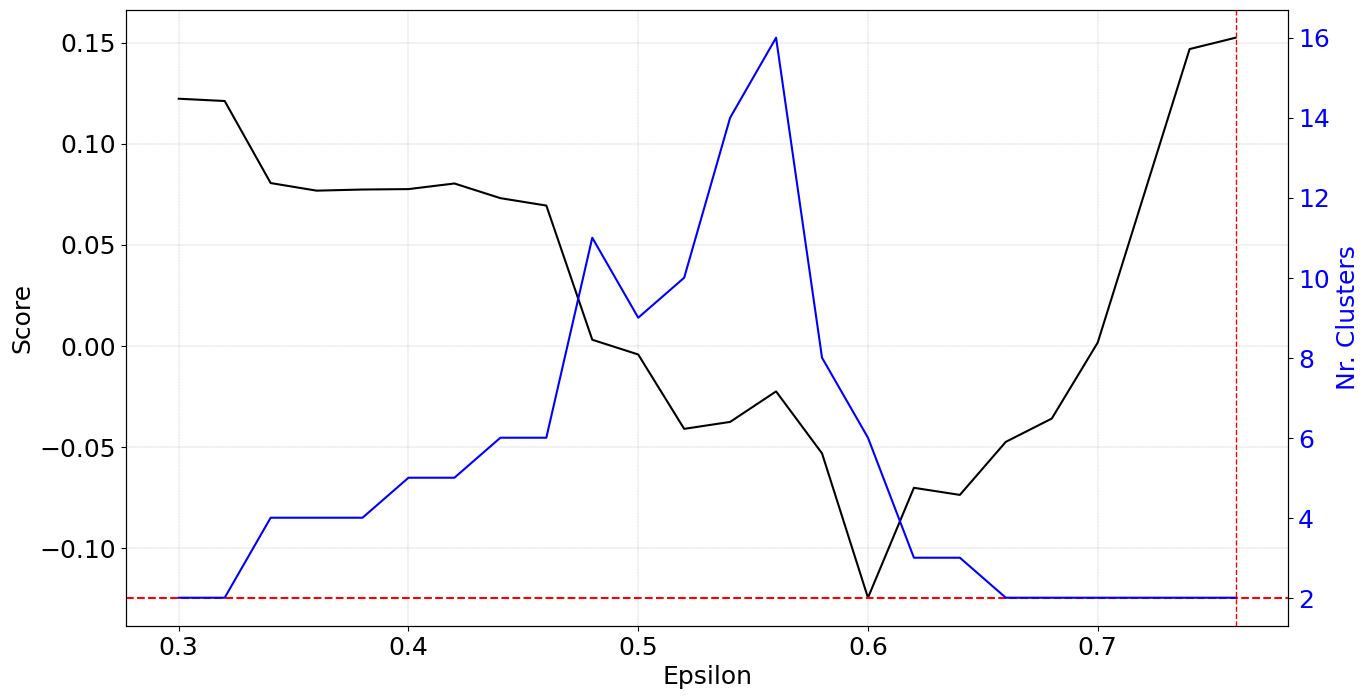

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.


TypeError: scatterd() got an unexpected keyword argument 'axiscolor'

In [114]:

from clusteval import clusteval


# Set parameters, as an example dbscan
ce = clusteval(cluster='dbscan', metric='cosine', linkage='average')

# Fit to find optimal number of clusters using dbscan
results = ce.fit(reduced_data)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(reduced_data)

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

In [60]:
print(reduced_data.shape)


(5245, 2)


In [169]:
from joblib import dump, load

dump(pca, 'pca.model')

['pca.model']

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer
import pandas as pd

class SSTDataset(Dataset):

    def __init__(self):
        self.files = filenames

        #Initialize the BERT tokenizer
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

        self.maxlen = 512

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        with open(filenames[index], 'r') as f:
            sentence = f.read()

        tokens = self.tokenizer.tokenize(sentence)
        tokens = ['[CLS]'] + tokens + ['[SEP]'] #Insering the CLS and SEP token in the beginning and end of the sentence
        if len(tokens) < self.maxlen:
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))] #Padding sentences
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]'] #Prunning the list to be of specified max length

        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens) #Obtaining the indices of the tokens in the BERT Vocabulary
        tokens_ids_tensor = torch.tensor(tokens_ids) #Converting the list to a pytorch tensor

        #Obtaining the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attn_mask = (tokens_ids_tensor != 0).long()

        return tokens_ids_tensor, attn_mask, label